<a href="https://colab.research.google.com/github/AnuskaBasantia/DeepLearning/blob/main/MNIST_DIGIT_CALCULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist


In [2]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_img.shape)


(60000, 28, 28)


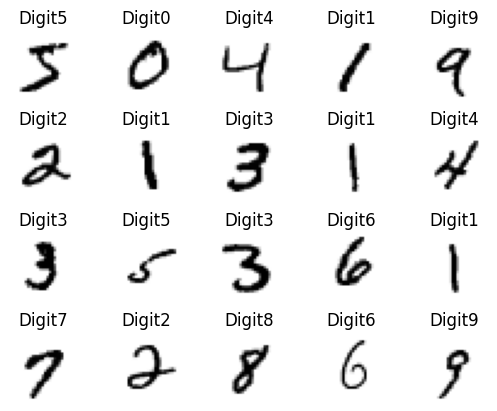

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i], cmap = 'gray_r')
  plt.title('Digit'+str(train_label[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

plt.show()


In [5]:
m,n=train_img[0].shape

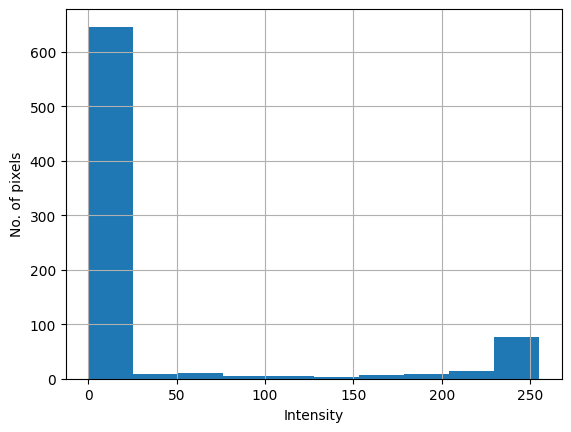

In [6]:
#histogram
plt.hist(train_img[1122].reshape(m*n))
plt.xlabel('Intensity')
plt.ylabel('No. of pixels')
plt.grid()
plt.show()

In [7]:
#scaling
train_img=train_img/225.0
test_img=test_img/225.0


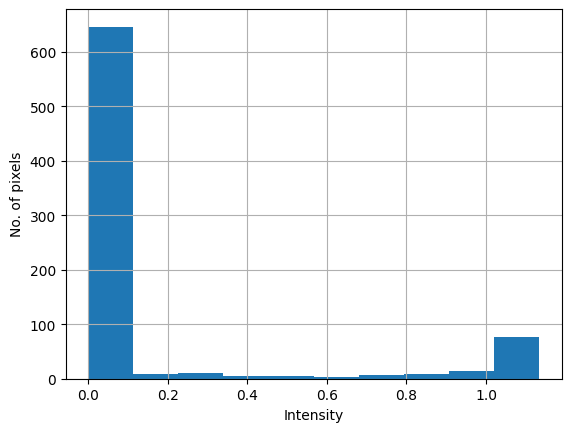

In [8]:
plt.hist(train_img[1122].reshape(m*n))
plt.xlabel('Intensity')
plt.ylabel('No. of pixels')
plt.grid()
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model=Sequential()
model.add(Flatten(input_shape=(m,n)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#compile and train
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_img,train_label,epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9056 - loss: 0.3073
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9746 - loss: 0.0808
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9838 - loss: 0.0534
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9871 - loss: 0.0401
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9909 - loss: 0.0284
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9905 - loss: 0.0292
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9932 - loss: 0.0204
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9933 - loss: 0.0214
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9946 - loss: 0.0177
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9945 - loss: 0.0180
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9945 - loss: 0.0165
Epoch 12

In [11]:
loss_acc=model.evaluate(test_img,test_label)
print('Loss:',loss_acc[0])
print('Accuracy:',loss_acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9762 - loss: 0.2548
Loss: 0.19595114886760712
Accuracy: 0.9801999926567078


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value: 0


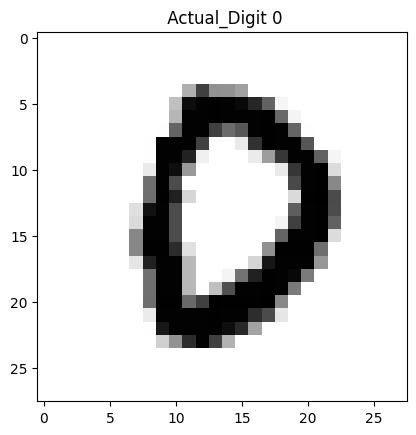

In [12]:
index=4457
plt.imshow(test_img[index], cmap = 'gray_r')
plt.title(' Actual_Digit '+ str(test_label[index]))

predicted=model.predict(test_img)

print('Predicted Value:',np.argmax(predicted[index]))
